In [1]:
# Importando a biblioteca
import numpy as np

# Importando matplotlib que iremos usar para visualizar algumas coisas
import matplotlib.pyplot as plt

# Funções que trabalham com arrays

O `numpy` além de criar arrays possui diversas formas de manipulá-los.

Uma das principais formas é através do uso de funções.

As funções do `numpy` são feitas para funcionar com arrays de quaisquer dimensões (vetores, matrizes, etc) e também escalares (números "soltos").

Por exemplo, existem diversas funções trigonométricas (que trabalham com radianos):

In [5]:
s = np.pi/6.0
x = np.linspace(0.0, np.pi, 10)
M = np.array([
    [np.pi, np.pi/3.0],
    [np.pi/4.0, 0.0],
])

print(np.sin(s), end="\n\n")

print(np.sin(x), end="\n\n")

print(np.sin(M))

0.49999999999999994

[0.00000000e+00 3.42020143e-01 6.42787610e-01 8.66025404e-01
 9.84807753e-01 9.84807753e-01 8.66025404e-01 6.42787610e-01
 3.42020143e-01 1.22464680e-16]

[[1.22464680e-16 8.66025404e-01]
 [7.07106781e-01 0.00000000e+00]]


## Funções trigonométricas

O `numpy` conta com as mais diversas funções trigonométricas, desde as básicas, até as inversas e hiperbólicas.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in arcsin
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in arccos


(0.0, 6.283185307179586)

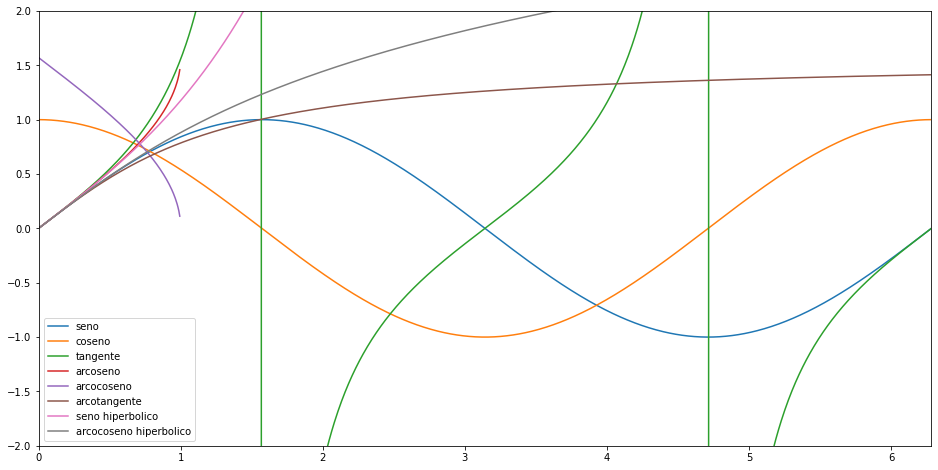

In [9]:
x = np.linspace(0.0, 2.0*np.pi, 1000)

funcoes_trigonometricas = {
    "seno": np.sin,
    "coseno": np.cos,
    "tangente": np.tan,
    "arcoseno": np.arcsin,
    "arcocoseno": np.arccos,
    "arcotangente": np.arctan,
    "seno hiperbolico": np.sinh,
    "arcocoseno hiperbolico": np.arcsinh,
}

fig, ax = plt.subplots(figsize=(16, 8))

for nome, funcao in funcoes_trigonometricas.items():
    ax.plot(x, funcao(x), label=nome)

ax.legend()
ax.set_ylim(-2, 2)
ax.set_xlim(0.0, 2.0*np.pi)

## Outras funções úteis

Além das funções trigonométricas o `numpy` conta com diversas outras funções úteis:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


(0.0, 2.0)

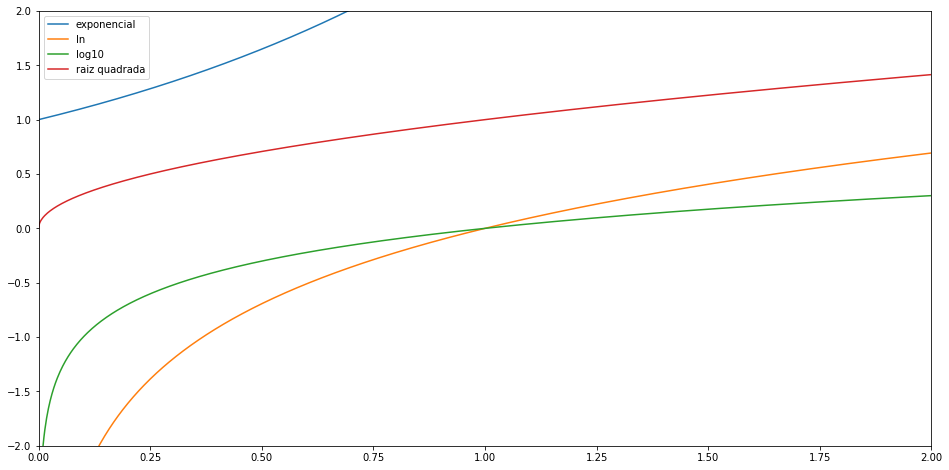

In [12]:
x = np.linspace(0.0, 2.0, 1000)

outras_funções = {
    "exponencial": np.exp,
    "ln": np.log,
    "log10": np.log10,
    "raiz quadrada": np.sqrt,
}

fig, ax = plt.subplots(figsize=(16, 8))

for nome, funcao in outras_funções.items():
    ax.plot(x, funcao(x), label=nome)

ax.legend()
ax.set_ylim(-2, 2)
ax.set_xlim(0.0, 2.0)

# Interpolação

O `numpy` conta com uma função que permite fazer interpolação linear chamada `interp`.

Essa função é útil quando desejamos fazer cálculos com vetores de tamanhos diferentes:

In [36]:
# x1 possui 50 pontos entre 0 e 2*pi
x1 = np.linspace(0.0, 2.0*np.pi, 50)

# x2 possui somente 10 pontos
x2 = np.linspace(0.0, 2.0*np.pi, 10)

y = np.sin(x1)
z = np.exp(x2)

# Não podemos multiplicar os vetores y e z
w = y * z

ValueError: ignored

In [52]:
# x1 possui 50 pontos entre 0 e 1
x1 = np.linspace(0.0, 1.0, 50)

# x2 possui somente 10 pontos
x2 = np.linspace(0.0, 1.0, 10)

y = np.sin(4.0*np.pi*x1)
z = np.exp(-x2)

# Porém se interpolarmos z para ter o mesmo número de pontos, é possível fazer a operação
z_interp = np.interp(x1, x2, z)

w = z_interp * y

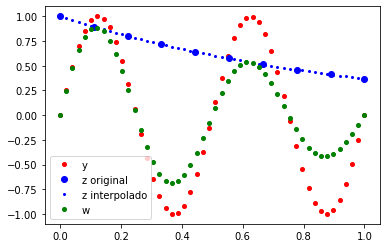

In [59]:
# Visualizando o que fizemos
plt.plot(x1, y, "ro", ms=4.0, label="y")
plt.plot(x2, z, "bo", label="z original")
plt.plot(x1, z_interp, "bo", ms=2.0, label="z interpolado")
plt.plot(x1, w, "go", ms=4.0, label="w")
plt.legend()

# Operações matriciais

O `numpy` trabalha também com matrizes.

Observe que diversos cálculos dependem do alinhamento correto do tamanho dos arrays.

## Produto matricial

Por exemplo, o produto matricial (que pode ser feito com o operador `@`) requer que o número de colunas do primeiro array seja igual ao número de linhas do segundo array:

In [15]:
A = np.array([
    [2, 3, 4],
    [3, 1, 0],
])

B = np.array([
    [-1, 0, 2],
    [4, 0, 2],
    [1, -1, 3],
])

# Essa operação funciona
print(A @ B)

# Essa operação não funciona
print(B @ A)

[[14 -4 22]
 [ 1  0  8]]


ValueError: ignored

## Produto termo a termo

O operador de multiplicação convencional (`*`) é usado para fazer multiplicações termo a termo:

In [19]:
A = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
])

B = np.array([
    [-1, 0, 2],
    [4, 0, 2],
    [1, -1, 3],
])

# Multiplicação termo a termo
print(A * B, end="\n\n")

# Multiplicação matricial
print(A @ B)

[[-1  0  0]
 [ 0  0  0]
 [ 0  0  3]]

[[-1  0  2]
 [ 4  0  2]
 [ 1 -1  3]]


## Transposição

A transposição de matrizes pode ser feita através do uso do atributo `T`, conforme o exemplo abaixo:

In [21]:
A = np.array([
    [2, 3, 4],
    [3, 1, 0],
])

B = np.array([
    [-1, 0, 2],
    [4, 0, 2],
    [1, -1, 3],
])

print(A.T, end="\n\n")

# Essa operação se A for transposto
print(B @ A.T)

[[2 3]
 [3 1]
 [4 0]]

[[ 6 -3]
 [16 12]
 [11  2]]


## Inversão

A inversão de matrizes é feita através da função `inv` do módulo `linalg` (esse módulo contém diversas operações de álgebra linear mais avançadas).

Observe que para inverter uma matriz a mesma deve ser quadrada e seu determinante deve ser não-nulo.

In [23]:
B = np.array([
    [-1, 0, 2],
    [4, 0, 2],
    [1, -1, 3],
])

print(np.linalg.inv(B), end="\n\n")

# Pela definição de inversão devemos obter uma matriz identidade
print(B @ np.linalg.inv(B))

[[-0.2  0.2  0. ]
 [ 1.   0.5 -1. ]
 [ 0.4  0.1  0. ]]

[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [1.11022302e-16 2.77555756e-17 1.00000000e+00]]


## Determinante

O determinante de uma matriz pode ser calculado com a função `det`, também presente no módulo `linalg`.

In [24]:
B = np.array([
    [-1, 0, 2],
    [4, 0, 2],
    [1, -1, 3],
])

print(np.linalg.det(B))

-10.000000000000002


# Trabalhando com índices

O `numpy` permite usar índices de forma mais avançada do que as listas comuns do Python.

Veremos rapidamente alguns exemplos.

## Booleanos

Podemos usar um array contendo números booleanos (`True` ou `False`) com o mesmo tamanho do array que estamos trabalhando.

Nesse caso, serão usados somente os elementos para os quais o array de índices tiver valor `True`, como visto abaixo:



In [25]:
x = np.array([1, 1, 2, 3, 5, 8, 13, 21, 34, 55])

b = np.array([False, False, True, False, False, False, False, True, False, False])

print(x[b])

[ 2 21]


É possível editar os valores dos arrays somente nessas posições:

In [26]:
x = np.array([1, 1, 2, 3, 5, 8, 13, 21, 34, 55])

b = np.array([False, False, True, False, False, False, False, True, False, False])

x[b] = -x[b]

print(x)

[  1   1  -2   3   5   8  13 -21  34  55]


Talvez o uso mais interessante seja fazendo comparações com o próprio array que estamos trabalhando:

In [27]:
x = np.array([1, 1, 2, 3, 5, 8, 13, 21, 34, 55])

# Esse array é True nas posições em que os elementos de x são maiores que 10
b = x > 10

print(x[b], end="\n\n")

# Zerando tais elementos
x[b] = 0

print(x)

[13 21 34 55]

[1 1 2 3 5 8 0 0 0 0]


## Inteiros

Índices inteiros permitem selecionar linhas/colunas arbitrárias de um array:

In [32]:
# x tem 20 linhas e 5 colunas
x = np.linspace(0.01, 1.0, 100).reshape((20, 5))

print(x, end="\n\n")

indices1 = [1, 3, 9]

# Vamos pegar somente as linhas 1, 3 e 9 de x
print(x[indices1], end="\n\n")

indices2 = [2, 4]

# Vamos pegar somente as colunas 2 e 4 de x:
print(x[:, indices2], end="\n\n")

[[0.01 0.02 0.03 0.04 0.05]
 [0.06 0.07 0.08 0.09 0.1 ]
 [0.11 0.12 0.13 0.14 0.15]
 [0.16 0.17 0.18 0.19 0.2 ]
 [0.21 0.22 0.23 0.24 0.25]
 [0.26 0.27 0.28 0.29 0.3 ]
 [0.31 0.32 0.33 0.34 0.35]
 [0.36 0.37 0.38 0.39 0.4 ]
 [0.41 0.42 0.43 0.44 0.45]
 [0.46 0.47 0.48 0.49 0.5 ]
 [0.51 0.52 0.53 0.54 0.55]
 [0.56 0.57 0.58 0.59 0.6 ]
 [0.61 0.62 0.63 0.64 0.65]
 [0.66 0.67 0.68 0.69 0.7 ]
 [0.71 0.72 0.73 0.74 0.75]
 [0.76 0.77 0.78 0.79 0.8 ]
 [0.81 0.82 0.83 0.84 0.85]
 [0.86 0.87 0.88 0.89 0.9 ]
 [0.91 0.92 0.93 0.94 0.95]
 [0.96 0.97 0.98 0.99 1.  ]]

[[0.06 0.07 0.08 0.09 0.1 ]
 [0.16 0.17 0.18 0.19 0.2 ]
 [0.46 0.47 0.48 0.49 0.5 ]]

[[0.03 0.05]
 [0.08 0.1 ]
 [0.13 0.15]
 [0.18 0.2 ]
 [0.23 0.25]
 [0.28 0.3 ]
 [0.33 0.35]
 [0.38 0.4 ]
 [0.43 0.45]
 [0.48 0.5 ]
 [0.53 0.55]
 [0.58 0.6 ]
 [0.63 0.65]
 [0.68 0.7 ]
 [0.73 0.75]
 [0.78 0.8 ]
 [0.83 0.85]
 [0.88 0.9 ]
 [0.93 0.95]
 [0.98 1.  ]]

[[0.08 0.1 ]
 [0.18 0.2 ]
 [0.48 0.5 ]]


## Slices

Os slices usados para pegar um intervalo de índices nas listas podem ser usados também nos arrays do `numpy`:

In [35]:
x = np.linspace(0.01, 1.0, 100).reshape((20, 5))

# Linhas de 3 a 10, não incluindo a 10
print(x[3:10], end="\n\n")

# Podemos selecionar simultaneamente as colunas
print(x[3:10, 1:3], end="\n\n")

# E combinar com os outros tipos de índices
print(x[3:10, -1])

[[0.16 0.17 0.18 0.19 0.2 ]
 [0.21 0.22 0.23 0.24 0.25]
 [0.26 0.27 0.28 0.29 0.3 ]
 [0.31 0.32 0.33 0.34 0.35]
 [0.36 0.37 0.38 0.39 0.4 ]
 [0.41 0.42 0.43 0.44 0.45]
 [0.46 0.47 0.48 0.49 0.5 ]]

[[0.17 0.18]
 [0.22 0.23]
 [0.27 0.28]
 [0.32 0.33]
 [0.37 0.38]
 [0.42 0.43]
 [0.47 0.48]]

[0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
